
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00        43

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432


Confusion Matrix:
[[389   0]
 [  0  43]]


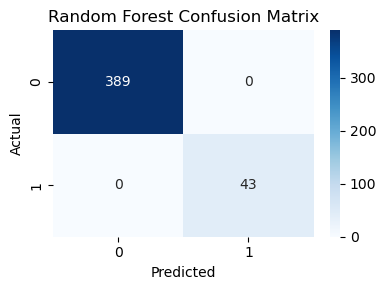

['C:/Users/ammar/SHAP_ML/models/rf_model_bearing.pkl']

In [4]:
# bearing_rf_classification.ipynb

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "C:/Users/ammar/SHAP_ML/outputs/bearing_classification.csv"  # adjust if needed
df = pd.read_csv(file_path)

# Features and labels
X = df.drop(columns=["label", "filename"])
y = df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train RF model
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Save model (optional)
import joblib
joblib.dump(rf, "C:/Users/ammar/SHAP_ML/models/rf_model_bearing.pkl")